In [231]:
#8TB Data check
#By Brandon Aitken


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import os

In [2]:
fioHeader = ['timeMS','speed','operation','unused','unusedPri']


#Dir of test Files to look in
testDir='R:/videoProjects/2024-05-22 HDD Compare/data/8TBTest'


In [3]:
driveDataDict = {}
#print(driveDirs)

drives = os.listdir(testDir)
tests = os.listdir(testDir+"/"+drives[0])

testTypeDict = {"randRead": "agg-read_bw.log","randWrite": "agg-write_bw.log","seqRead": "agg-read_bw.log","seqWrite": "agg-write_bw.log","smrTest": "agg-write_bw.log"}

for i in drives:
    testDict = {}
    for j in tests:

        csvData = pd.read_csv(testDir+"/"+i+"/"+j+"/"+testTypeDict[j],names=fioHeader)
        csvData['mbps'] = csvData['speed']/1024
        if j == "randRead" or j == "randWrite":
            csvData['iops'] = csvData['mbps'] * 256
        else:
            csvData['iops'] = csvData['mbps']
        csvData['seconds'] = csvData['timeMS']/1000
        csvData['minutes'] = csvData['seconds']/60
        testDict[j] = csvData
    driveDataDict[i] = testDict









In [4]:
print(driveDataDict['Seagate Barracuda']['randRead'])

     timeMS  speed  operation  unused  unusedPri      mbps   iops  seconds  \
0       626     63          0       0          0  0.061523  15.75    0.626   
1      1128    223          0       0          0  0.217773  55.75    1.128   
2      1629    215          0       0          0  0.209961  53.75    1.629   
3      2250    225          0       0          0  0.219727  56.25    2.250   
4      2999    208          0       0          0  0.203125  52.00    2.999   
..      ...    ...        ...     ...        ...       ...    ...      ...   
96    57246    215          0       0          0  0.209961  53.75   57.246   
97    57750    214          0       0          0  0.208984  53.50   57.750   
98    58499    218          0       0          0  0.212891  54.50   58.499   
99    59249    213          0       0          0  0.208008  53.25   59.249   
100   59750    191          0       0          0  0.186523  47.75   59.750   

      minutes  
0    0.010433  
1    0.018800  
2    0.027150  

In [5]:
#get average speeds
meanDict = {}

for i in driveDataDict.keys():
    meanny = {}
    for j in driveDataDict[i].keys():

        meanny[j] = (driveDataDict[i][j]['speed']/1024).mean().round(4)
    meanDict[i] = meanny



In [6]:
meanDict

{'Seagate Barracuda': {'randRead': 0.2092,
  'randWrite': 0.2505,
  'seqRead': 137.8604,
  'seqWrite': 138.1333,
  'smrTest': 14.6065},
 'Seagate Ironwolf': {'randRead': 0.2732,
  'randWrite': 1.1325,
  'seqRead': 200.7764,
  'seqWrite': 200.1747,
  'smrTest': 110.2214},
 'Shucked Air': {'randRead': 0.2709,
  'randWrite': 2.0747,
  'seqRead': 152.5523,
  'seqWrite': 152.217,
  'smrTest': 49.6847},
 'Shucked Helium': {'randRead': 0.2491,
  'randWrite': 1.3345,
  'seqRead': 144.9261,
  'seqWrite': 144.946,
  'smrTest': 47.1779},
 'Used HGST': {'randRead': 0.2397,
  'randWrite': 1.3438,
  'seqRead': 196.4626,
  'seqWrite': 159.1031,
  'smrTest': 78.1225},
 'WD Gold': {'randRead': 0.3014,
  'randWrite': 2.3338,
  'seqRead': 200.7339,
  'seqWrite': 200.7242,
  'smrTest': 100.0527}}

In [7]:
columns = tests.copy()
columns.insert(0,"driveModel")
print(columns)

speedDF = pd.DataFrame(columns=columns)

#print(drives)
#print(speedDF)

for i in drives: 
    rowData = i, meanDict[i][columns[1]],meanDict[i][columns[2]],meanDict[i][columns[3]],meanDict[i][columns[4]],meanDict[i][columns[5]]

    speedDF.loc[len(speedDF)] = rowData
    #speedDF.index = speedDF.index + 1


speedDF






['driveModel', 'randRead', 'randWrite', 'seqRead', 'seqWrite', 'smrTest']


,driveModel,randRead,randWrite,seqRead,seqWrite,smrTest
0,Seagate Barracuda,0.2092,0.2505,137.8604,138.1333,14.6065
1,Seagate Ironwolf,0.2732,1.1325,200.7764,200.1747,110.2214
2,Shucked Air,0.2709,2.0747,152.5523,152.2170,49.6847
3,Shucked Helium,0.2491,1.3345,144.9261,144.9460,47.1779
4,Used HGST,0.2397,1.3438,196.4626,159.1031,78.1225
5,WD Gold,0.3014,2.3338,200.7339,200.7242,100.0527


In [8]:
iopsDict = {}

for i in driveDataDict.keys():
    meanny = {}
    for j in driveDataDict[i].keys():

        meanny[j] = (driveDataDict[i][j]['iops']).mean().round(4)
    iopsDict[i] = meanny

columns = tests.copy()
columns.insert(0,"driveModel")
print(columns)

iopsDF = pd.DataFrame(columns=columns)

#print(drives)
#print(speedDF)

for i in drives: 
    rowData = i, iopsDict[i][columns[1]],iopsDict[i][columns[2]],iopsDict[i][columns[3]],iopsDict[i][columns[4]],iopsDict[i][columns[5]]

    iopsDF.loc[len(iopsDF)] = rowData
    #speedDF.index = speedDF.index + 1


iopsDF


['driveModel', 'randRead', 'randWrite', 'seqRead', 'seqWrite', 'smrTest']


,driveModel,randRead,randWrite,seqRead,seqWrite,smrTest
0,Seagate Barracuda,53.5619,64.1263,137.8604,138.1333,14.6065
1,Seagate Ironwolf,69.9293,289.9212,200.7764,200.1747,110.2214
2,Shucked Air,69.3516,531.1222,152.5523,152.2170,49.6847
3,Shucked Helium,63.7711,341.6401,144.9261,144.9460,47.1779
4,Used HGST,61.3738,344.0215,196.4626,159.1031,78.1225
5,WD Gold,77.1708,597.4417,200.7339,200.7242,100.0527


In [9]:
driveDataDict.keys()

dict_keys(['Seagate Barracuda', 'Seagate Ironwolf', 'Shucked Air', 'Shucked Helium', 'Used HGST', 'WD Gold'])

[0 1 2 3 4 5]


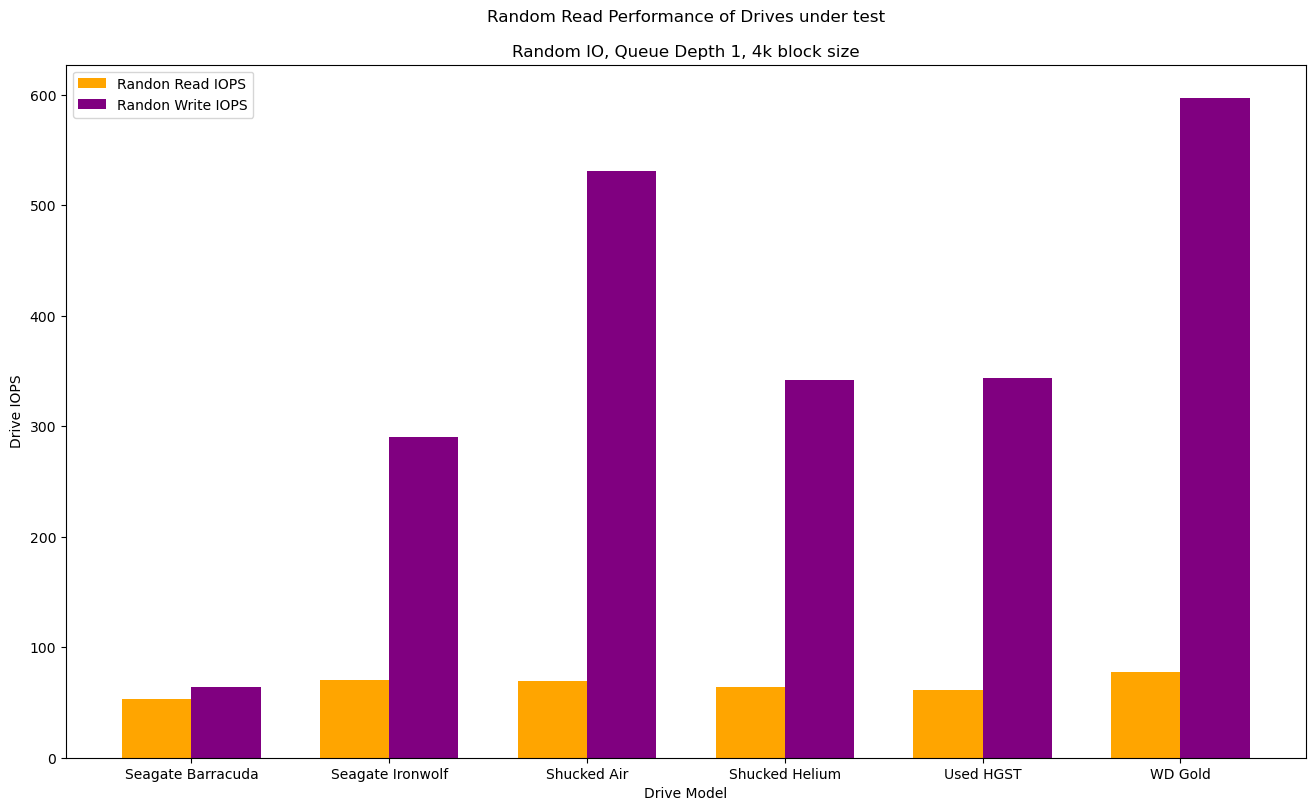

In [10]:
barWidth = .35

b1 = np.arange(len(drives))
b2 = [x + barWidth for x in b1]

print(b1)

plt.bar(b1,iopsDF['randRead'],color='orange',width=barWidth, label='Randon Read IOPS')
plt.bar(b2,iopsDF['randWrite'],color='purple',width=barWidth, label='Randon Write IOPS')
plt.title("Random Read Performance of Drives under test\n\nRandom IO, Queue Depth 1, 4k block size")
plt.xlabel("Drive Model")
plt.ylabel("Drive IOPS")
plt.xticks([r + barWidth / 2 for r in range(len(drives))], drives)

plt.legend()

fig = plt.gcf()
fig.set_size_inches(16,9)
fig.savefig('randonIO.png',dpi=300)

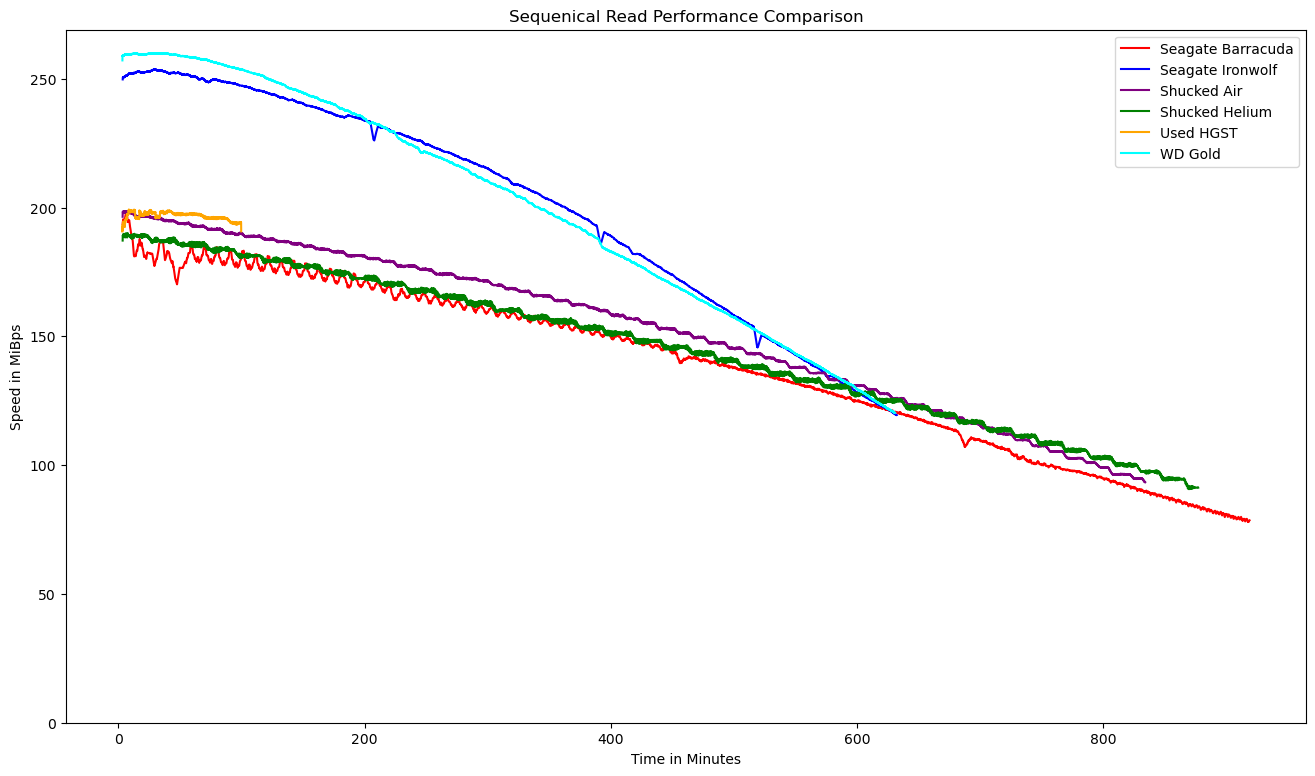

In [11]:
colors=['red','blue','purple','green','orange','cyan']

index=0


for i in drives:
    plt.plot(driveDataDict[i]['seqRead']['minutes'],driveDataDict[i]['seqRead']['mbps'].rolling(300).mean(),color=colors[index],label=i)
    index += 1
plt.legend(loc='upper right')
plt.title("Sequenical Read Performance Comparison")
plt.ylabel("Speed in MiBps")
plt.xlabel("Time in Minutes")
plt.ylim(bottom=0)
fig = plt.gcf()
fig.set_size_inches(16,9)
fig.savefig('seqRead.png',dpi=300)

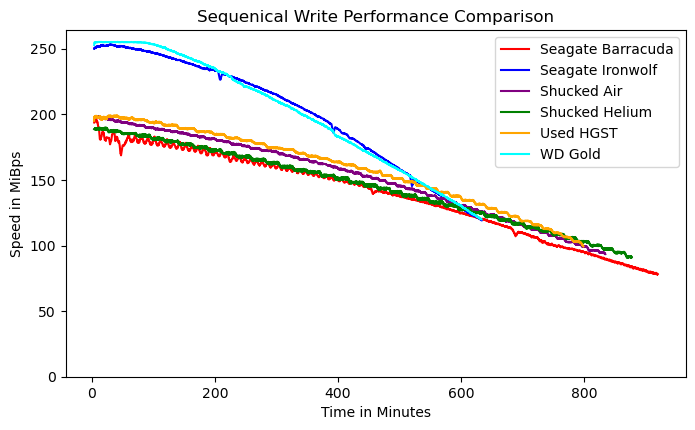

In [12]:
colors=['red','blue','purple','green','orange','cyan']

index=0


for i in drives:
    plt.plot(driveDataDict[i]['seqWrite']['minutes'],driveDataDict[i]['seqWrite']['mbps'].rolling(300).mean(),color=colors[index],label=i)
    index += 1
plt.legend(loc='upper right')
plt.title("Sequenical Write Performance Comparison")
plt.ylabel("Speed in MiBps")
plt.xlabel("Time in Minutes")
plt.ylim(bottom=0)
fig = plt.gcf()
fig.set_size_inches(8,4.5)
fig.savefig('seqWrite.png',dpi=600)

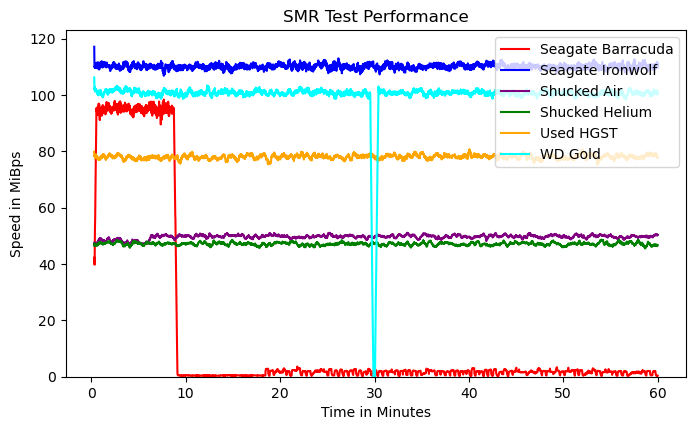

In [13]:
colors=['red','blue','purple','green','orange','cyan']

index=0


for i in drives:
    plt.plot(driveDataDict[i]['smrTest']['minutes'],driveDataDict[i]['smrTest']['mbps'].rolling(30).mean(),color=colors[index],label=i)
    index += 1
plt.legend(loc='upper right')
plt.title("SMR Test Performance")
plt.ylabel("Speed in MiBps")
plt.xlabel("Time in Minutes")
plt.ylim(bottom=0)
fig = plt.gcf()
fig.set_size_inches(8,4.5)
fig.savefig('smrTest.png',dpi=600)